In [ ]:
# BIỂU ĐỒ CƠ BẢN VỚI MATPLOTLIB
# Vẽ từng hình lẻ
# bar chart: plt.bar
# pie chart: plt.pie
# line plot: plt.plot
# scatter plot: plt.scatter

# Kết hợp các hình
  # Cùng trục
    # Cùng trục y:
      # hình 1
      # hình 2
      # plt.show()
    # Bên trái trục y1, bên phải trục y2
      # axes1 = plt.gca()
      # axes2 = axes1.twinx()
      # hình 2: axes2.
  # Cùng khung: 2 hình trên, 2 hình dưới
    # fig, ax = plt.subplots(2,2)
    # hình phía trên bên trái: ax[0][0].bar()
    # hình phía trên bên phải: ax[0][1].
    # hình phía dưới bên trái: ax[1][0].
    # hình cuối cùng: ax[1][1].

In [ ]:
# BIỂU ĐỒ NÂNG CAO VỚI SEABORN

# Mối quan hệ giữa 2 biến: lmplot() = scatter plot + line plot

# Mô tả phân bổ của biến
  # biến định lượng: histogram (sns.hist), violinplot
  # biến định tính: countplot()

# So sánh giữa 2 biến: boxplot (so khoảng của mỗi biến)

# Nhiều biến: Xem mối quan hệ giữa các cặp biến và phân bổ của từng biến
  # Xem mối quan hệ giữa các biến: heatmap
  # Xem mối quan hệ giữa các cặp biến + Xem phân bổ của từng biến: pairplot

# Thực hành với bộ dữ liệu Online Retail

In [ ]:
# Khai báo thư viện cần dùng
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Đọc dữ liệu
df = pd.read_csv("OnlineRetail.csv", encoding = "ISO-8859-1")

In [ ]:
# Tạo ra cột mới, "Price" của mỗi đơn hàng
df['Price']=df['UnitPrice']*df['Quantity']

In [ ]:
# Xem dữ liệu
# Xem dạng dữ liệu từng cột
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
 8   Price        541909 non-null  float64
dtypes: float64(3), int64(1), object(5)
memory usage: 37.2+ MB


In [ ]:
# Xem tổng quát thống kê
df.describe()

,Quantity,UnitPrice,CustomerID,Price
count,541909.000000,541909.000000,406829.000000,541909.000000
mean,9.552250,4.611114,15287.690570,17.987795
std,218.081158,96.759853,1713.600303,378.810824
min,-80995.000000,-11062.060000,12346.000000,-168469.600000
25%,1.000000,1.250000,13953.000000,3.400000
50%,3.000000,2.080000,15152.000000,9.750000
75%,10.000000,4.130000,16791.000000,17.400000
max,80995.000000,38970.000000,18287.000000,168469.600000


In [ ]:
df = df.dropna()

In [ ]:
df.describe()

,Quantity,UnitPrice,CustomerID,Price
count,406829.000000,406829.000000,406829.000000,406829.000000
mean,12.061303,3.460471,15287.690570,20.401854
std,248.693370,69.315162,1713.600303,427.591718
min,-80995.000000,0.000000,12346.000000,-168469.600000
25%,2.000000,1.250000,13953.000000,4.200000
50%,5.000000,1.950000,15152.000000,11.100000
75%,12.000000,3.750000,16791.000000,19.500000
max,80995.000000,38970.000000,18287.000000,168469.600000


## Vẽ biểu đồ phân phối

<Axes: >

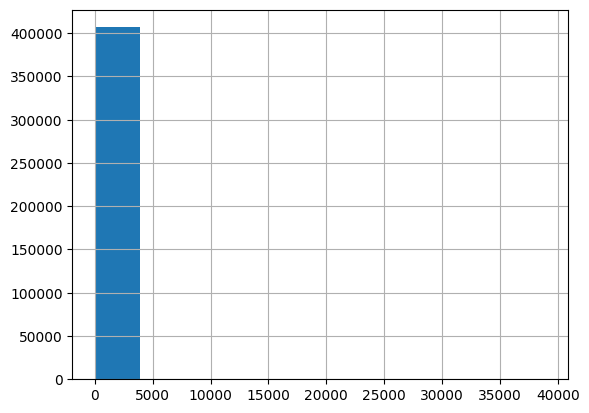

In [ ]:
# Vẽ biểu đồ mô tả phân bổ đơn giá sản phẩm
df['UnitPrice'].hist()

<Axes: >

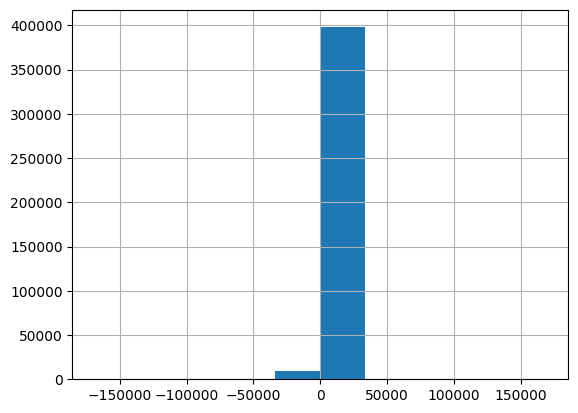

In [ ]:
# Vẽ biểu đồ mô tả phân bổ giá của mỗi đơn hàng
df['Price'].hist()

# Xem tần suất

<Axes: xlabel='Country', ylabel='count'>

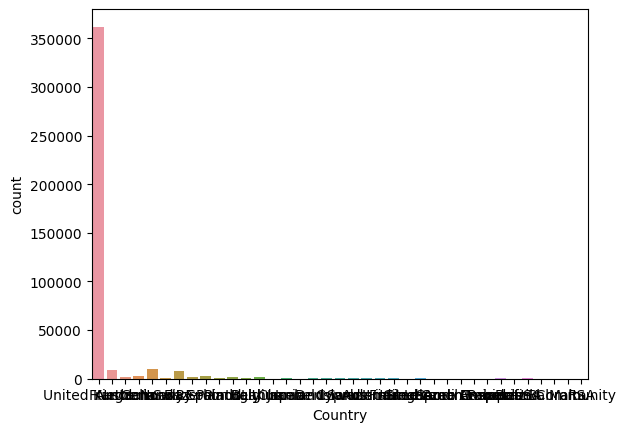

In [ ]:
# Giả sử: mỗi dòng dữ liệu là một đơn hàng
# Xem mỗi quốc gia có bao nhiêu đơn hàng (Đếm)
sns.countplot(x='Country', data=df)

<Axes: xlabel='Country', ylabel='count'>

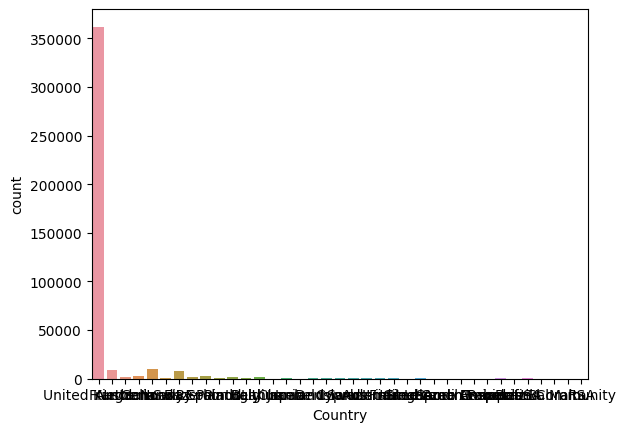

In [ ]:
sns.countplot(x=df['Country'])

<BarContainer object of 5 artists>

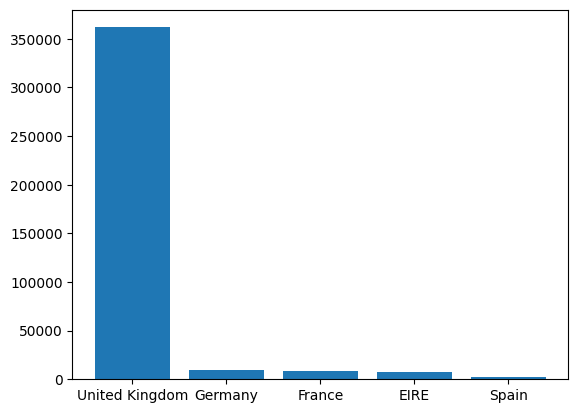

In [ ]:
top_df = df.groupby('Country')['InvoiceNo'].count().sort_values(ascending=False)
top_df_5= top_df.head(5)
top_df_5 = top_df_5.reset_index()
plt.bar(top_df_5['Country'], top_df_5['InvoiceNo'])

In [ ]:
# Xem top 5 quốc gia nhiều đơn hàng nhất
lst = df['Country'].value_counts().head().index.to_list()

<Axes: xlabel='Country', ylabel='count'>

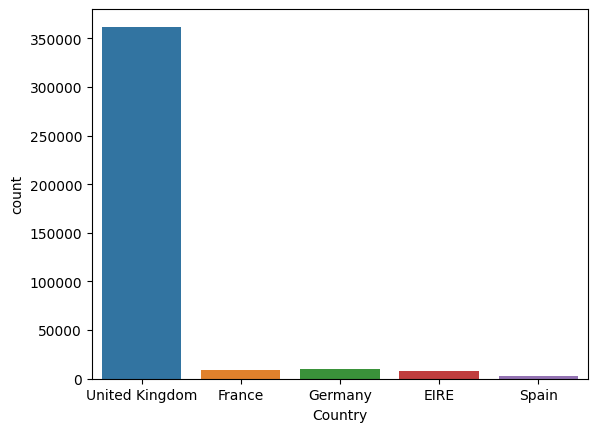

In [ ]:
# Xem top 5 quốc gia nhiều đơn hàng nhất
lst = df['Country'].value_counts().head().index.to_list()
df1 = df[df['Country'].isin(lst)]
sns.countplot(x=df1['Country'])

In [ ]:
df2 = df['Country'].value_counts().head().reset_index()
df2.columns = ['Country', 'Count']

<BarContainer object of 5 artists>

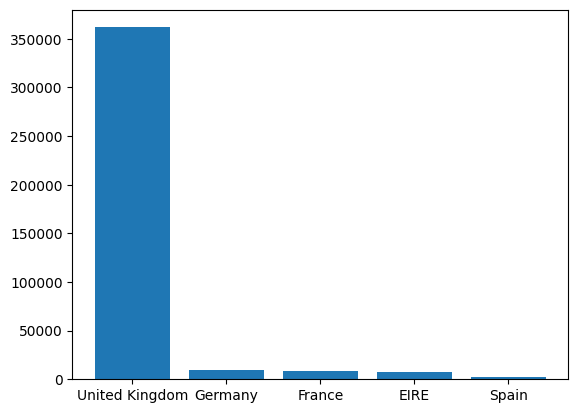

In [ ]:
plt.bar(df2['Country'], df2['Count'])

## Vẽ biểu đồ boxplot

<Axes: xlabel='UnitPrice'>

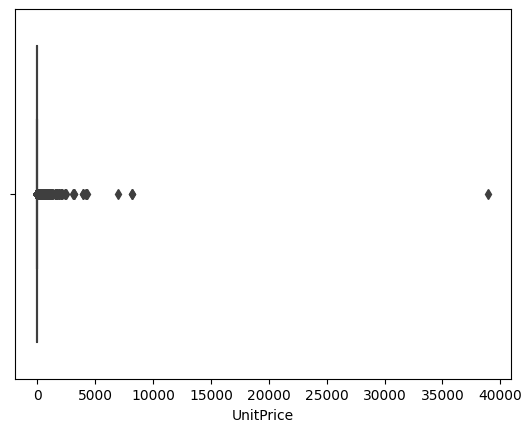

In [ ]:
# Vẽ boxplot của UnitPrice
sns.boxplot(x=df['UnitPrice'])

<Axes: xlabel='Quantity'>

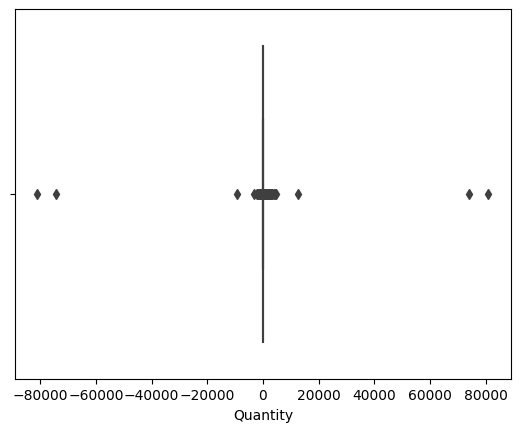

In [ ]:
sns.boxplot(x=df['Quantity'])

In [ ]:
lst1 = df[df['Quantity'] < 0]['InvoiceNo'].unique().tolist()
df2 = df[~df['InvoiceNo'].isin(lst1)]

In [ ]:
df2.describe()

,Quantity,UnitPrice,CustomerID,Price
count,397924.000000,397924.000000,397924.000000,397924.000000
mean,13.021823,3.116174,15294.315171,22.394749
std,180.420210,22.096788,1713.169877,309.055588
min,1.000000,0.000000,12346.000000,0.000000
25%,2.000000,1.250000,13969.000000,4.680000
50%,6.000000,1.950000,15159.000000,11.800000
75%,12.000000,3.750000,16795.000000,19.800000
max,80995.000000,8142.750000,18287.000000,168469.600000


In [ ]:
df2['InvoiceNo'].astype('int').reset_index().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397924 entries, 0 to 397923
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   index      397924 non-null  int64
 1   InvoiceNo  397924 non-null  int64
dtypes: int64(2)
memory usage: 6.1 MB


# Thực hành với bộ dữ liệu GDPlist

In [ ]:
df = pd.read_csv("GDPlist.csv", encoding = "ISO-8859-1")

In [ ]:
df.head()

,Country,Continent,GDP (millions of US$)
0,Afghanistan,Asia,18181
1,Albania,Europe,12847
2,Algeria,Africa,190709
3,Angola,Africa,100948
4,Argentina,South America,447644


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Country                125 non-null    object
 1   Continent              125 non-null    object
 2   GDP (millions of US$)  125 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 3.1+ KB


In [ ]:
df.describe()

,GDP (millions of US$)
count,1.250000e+02
mean,5.554278e+05
std,1.649266e+06
min,1.060000e+04
25%,2.574200e+04
50%,9.608900e+04
75%,3.332380e+05
max,1.509402e+07


<Axes: >

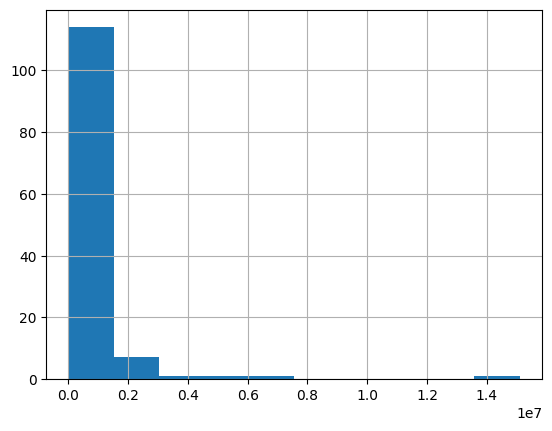

In [ ]:
# Vẽ biểu đồ để xem phân bổ dữ liệu của cột GDP (millions of US$)
df["GDP (millions of US$)"].hist()

<Axes: >

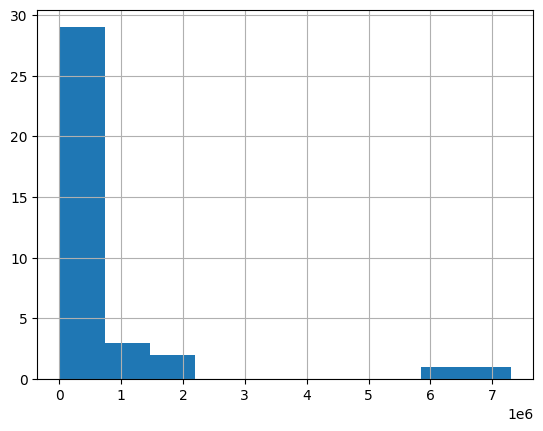

In [ ]:
# Vẽ biểu đồ xem phân bổ GDP ở châu á
df1 = df[df['Continent'] == 'Asia']
df1["GDP (millions of US$)"].hist()

<Axes: xlabel='Continent', ylabel='GDP (millions of US$)'>

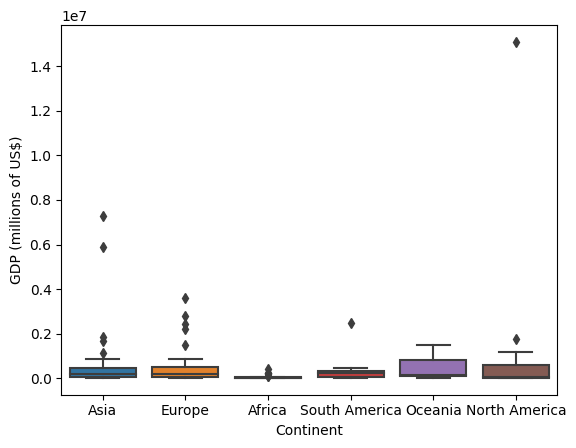

In [ ]:
# Vẽ biểu đồ để so sánh khoảng GDP giữa các châu lục
sns.boxplot(x = df['Continent'], y = 'GDP (millions of US$)', data = df)